In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

In [12]:
lista_alumnos = [("Leonardo S", 24, 1.82), 
                 ("Piero T", 25, 1.71), 
                 ("Marta B", 35, 1.66), 
                 ("Silvia P", 37, 1.63), 
                 ("Faro Z", 29, 1.90), 
                 ("Miguel N", 27, 1.80), 
                 ("Alejandro M", 28, 1.70), 
                 ("Cristina M", 32, 1.60), 
                 ("Francisco P", 36, 1.74), 
                 ("Jorge D", 45, 1.72), 
                 ("Jesús L", 41, 1.65), 
                 ("Marta G", 30, 1.65), 
                 ("Jennifer S", 40, 1.60), 
                 ("Diego I", 39, 1.80), 
                 ("Antonio C", 23, 1.77), 
                 ("Juan M", 32, 1.75), 
                 ("David S", 27, 1.70), 
                 ("Antonio J", 34, 1.80), 
                 ("Carlos H", 27, 1.77), 
                 ("Erik U", 28, 1.70), 
                 ("Marcos L", 35, 1.80)] 

In [22]:
dfalumnos = pd.DataFrame(lista_alumnos)
dfalumnos

,0,1,2
0,Leonardo S,24,1.82
1,Piero T,25,1.71
2,Marta B,35,1.66
3,Silvia P,37,1.63
4,Faro Z,29,1.90
5,Miguel N,27,1.80
6,Alejandro M,28,1.70
7,Cristina M,32,1.60
8,Francisco P,36,1.74
9,Jorge D,45,1.72


<Axes: xlabel='1', ylabel='2'>

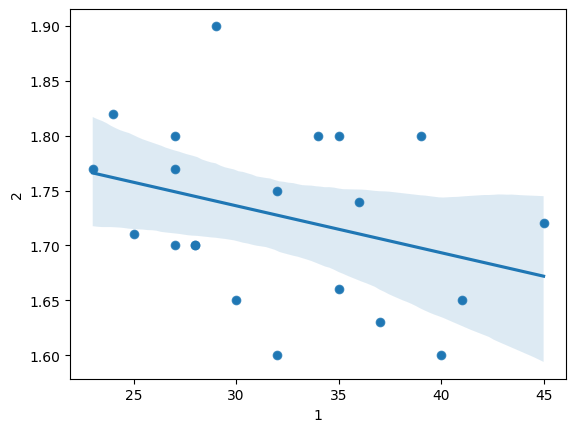

In [51]:
sns.scatterplot(data = dfalumnos, x=dfalumnos[1], y = dfalumnos[2])
sns.regplot(data = dfalumnos, x=dfalumnos[1], y = dfalumnos[2])

### ¿Es una buena técnica para este tipo de problemas? Demuéstralo antes de entrenar un modelo con un análisis descriptivo.

<Axes: >

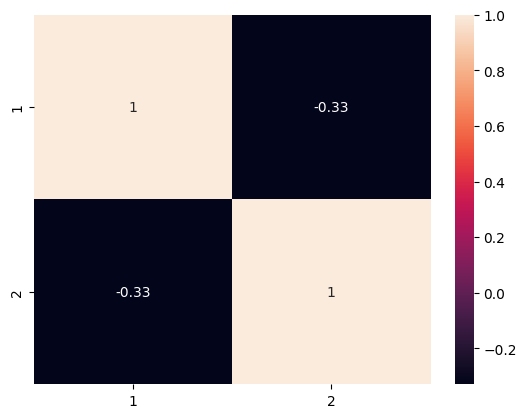

In [20]:
dfcorr = dfalumnos.corr(numeric_only=True)
sns.heatmap(dfcorr, annot= True)

No es la mejor técnica para esta casuística, ya que no hay casi correlación entre las variables.

### Entrena un modelo de regresión lineal

In [60]:
from sklearn.model_selection import train_test_split

X = dfalumnos[[1]]
Y = dfalumnos[[2]]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (21, 1)
Train features shape: (14, 1)
Train target shape: (14, 1)
Test features shape: (7, 1)
Test target shape: (7, 1)


In [61]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [62]:
predictions = lm.predict(X_test)
predictions

array([[1.75272915],
       [1.71132853],
       [1.71960865],
       [1.74858908],
       [1.7030484 ],
       [1.74030896],
       [1.72788877]])

### ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo de forma manual con python. Aparte, usa las métricas de sklearn MAE, MAPE, MSE y el RMSE.

In [63]:
coeff_df = pd.DataFrame(lm.coef_,
                        X.columns,
                        columns=['Coefficient'])
coeff_df

,Coefficient
1,-0.00414


In [65]:
from sklearn import metrics

lm.score(X_test, y_test)

-0.19742015635643928

In [66]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
# print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))7
print('RMSE:', metrics.root_mean_squared_error(y_test, predictions))

MAE: 0.05706488156539665
MSE: 0.0036851216240520687
RMSE: 0.060705202611078306
